<a href="https://colab.research.google.com/github/Elvin100s/Formative3_Group-20_Assignment/blob/master/part2_bayesian_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Formative Group 20 members

- Hugues Munezero
- Cyubahiro Elvin
- Silver Jr Shalom Nshuti
- Nsabagasani Emmanuel

#  Part 2: Bayesian Probability
## IMDb Sentiment Analysis using Bayes' Theorem

We compute **P(Positive | keyword)** for selected sentiment keywords using Bayes' Theorem:

$$P(\text{Positive} \mid \text{keyword}) = \frac{P(\text{keyword} \mid \text{Positive}) \cdot P(\text{Positive})}{P(\text{keyword})}$$

| Term | Description |
|------|-------------|
| Prior | P(Positive) — baseline rate of positive reviews |
| Likelihood | P(keyword\|Positive) — keyword frequency in positive reviews |
| Marginal | P(keyword) — keyword frequency across all reviews |
| Posterior | P(Positive\|keyword) — updated probability given the keyword |

---

##  Keyword Selection

| Sentiment | Keywords |
|-----------|----------|
| ✅ Positive | `brilliant`, `masterpiece`, `captivating`, `outstanding` |
| ❌ Negative | `terrible`, `awful`, `boring`, `dreadful` |

These words were chosen for their strong, unambiguous sentiment associations and sufficient frequency in the dataset.

---

## Step 1: Load the Dataset

In [49]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download('lakshmi25npathi/imdb-dataset-of-50k-movie-reviews')
df = pd.read_csv(os.path.join(path, 'IMDB Dataset.csv'))

print(f"Total reviews : {len(df):,}")
print(df['sentiment'].value_counts())
df.head(3)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Total reviews : 50,000
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


##  Step 2: Pre-process Reviews

In [50]:
df['review_lower'] = df['review'].str.lower()

positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

total     = len(df)
total_pos = len(positive_reviews)
total_neg = len(negative_reviews)

print(f"Positive: {total_pos:,} | Negative: {total_neg:,} | Total: {total:,}")

Positive: 25,000 | Negative: 25,000 | Total: 50,000


**bold text**##  Step 3: Compute the Prior — P(Positive)

In [51]:
prior_positive = total_pos / total
print(f"P(Positive) = {total_pos:,} / {total:,} = {prior_positive:.4f}")

P(Positive) = 25,000 / 50,000 = 0.5000


##  Step 4: Bayes' Theorem Engine

In [52]:
def count_keyword(keyword, subset):
    count = 0
    for review in subset['review_lower']:
        if keyword in review:
            count += 1
    return count


def compute_bayes(keyword):
    kw_in_pos = count_keyword(keyword, positive_reviews)
    kw_in_all = count_keyword(keyword, df)

    prior      = prior_positive
    likelihood = kw_in_pos / total_pos if total_pos > 0 else 0
    marginal   = kw_in_all / total     if total     > 0 else 0
    posterior  = (likelihood * prior)  / marginal   if marginal > 0 else 0

    return {
        'keyword'    : keyword,
        'kw_in_pos'  : kw_in_pos,
        'kw_in_all'  : kw_in_all,
        'prior'      : round(prior,      4),
        'likelihood' : round(likelihood, 4),
        'marginal'   : round(marginal,   4),
        'posterior'  : round(posterior,  4),
    }

##  Step 5: Run Analysis for All Keywords

In [53]:
positive_keywords = ['brilliant', 'masterpiece', 'captivating', 'outstanding']
negative_keywords = ['terrible', 'awful', 'boring', 'dreadful']
all_keywords      = positive_keywords + negative_keywords

results = [compute_bayes(kw) for kw in all_keywords]
print(f"Analysis complete — {len(results)} keywords processed.")

Analysis complete — 8 keywords processed.


**bold text**##  Step 6: Results — Probability Tables

In [54]:
from IPython.display import display, Markdown

def display_result(r, group):
    icon = '✅' if group == 'positive' else '❌'
    md = f"""
### {icon} Keyword: `\"{r['keyword']}\"`
| Component | Formula | Value |
|-----------|---------|-------|
| Prior | P(Positive) | `{r['prior']}` |
| Likelihood | P(\"{r['keyword']}\" \\| Positive) | `{r['likelihood']}` |
| Marginal | P(\"{r['keyword']}\") | `{r['marginal']}` |
| Posterior | P(Positive \\| \"{r['keyword']}\") | `{r['posterior']}` |

> Appeared in **{r['kw_in_pos']:,}** positive reviews out of **{r['kw_in_all']:,}** total — Posterior: **{r['posterior']*100:.2f}%**
---"""
    display(Markdown(md))

display(Markdown("## 🟢 Positive Keywords"))
for r in results:
    if r['keyword'] in positive_keywords:
        display_result(r, 'positive')

display(Markdown("## 🔴 Negative Keywords"))
for r in results:
    if r['keyword'] in negative_keywords:
        display_result(r, 'negative')

## 🟢 Positive Keywords


### ✅ Keyword: `"brilliant"`
| Component | Formula | Value |
|-----------|---------|-------|
| Prior | P(Positive) | `0.5` |
| Likelihood | P("brilliant" \| Positive) | `0.0755` |
| Marginal | P("brilliant") | `0.0489` |
| Posterior | P(Positive \| "brilliant") | `0.7711` |

> Appeared in **1,887** positive reviews out of **2,447** total — Posterior: **77.11%**
---


### ✅ Keyword: `"masterpiece"`
| Component | Formula | Value |
|-----------|---------|-------|
| Prior | P(Positive) | `0.5` |
| Likelihood | P("masterpiece" \| Positive) | `0.0377` |
| Marginal | P("masterpiece") | `0.0264` |
| Posterior | P(Positive \| "masterpiece") | `0.7131` |

> Appeared in **942** positive reviews out of **1,321** total — Posterior: **71.31%**
---


### ✅ Keyword: `"captivating"`
| Component | Formula | Value |
|-----------|---------|-------|
| Prior | P(Positive) | `0.5` |
| Likelihood | P("captivating" \| Positive) | `0.0066` |
| Marginal | P("captivating") | `0.0042` |
| Posterior | P(Positive \| "captivating") | `0.7905` |

> Appeared in **166** positive reviews out of **210** total — Posterior: **79.05%**
---


### ✅ Keyword: `"outstanding"`
| Component | Formula | Value |
|-----------|---------|-------|
| Prior | P(Positive) | `0.5` |
| Likelihood | P("outstanding" \| Positive) | `0.0254` |
| Marginal | P("outstanding") | `0.0153` |
| Posterior | P(Positive \| "outstanding") | `0.8309` |

> Appeared in **634** positive reviews out of **763** total — Posterior: **83.09%**
---

## 🔴 Negative Keywords


### ❌ Keyword: `"terrible"`
| Component | Formula | Value |
|-----------|---------|-------|
| Prior | P(Positive) | `0.5` |
| Likelihood | P("terrible" \| Positive) | `0.0154` |
| Marginal | P("terrible") | `0.0541` |
| Posterior | P(Positive \| "terrible") | `0.1419` |

> Appeared in **384** positive reviews out of **2,707** total — Posterior: **14.19%**
---


### ❌ Keyword: `"awful"`
| Component | Formula | Value |
|-----------|---------|-------|
| Prior | P(Positive) | `0.5` |
| Likelihood | P("awful" \| Positive) | `0.0136` |
| Marginal | P("awful") | `0.0624` |
| Posterior | P(Positive \| "awful") | `0.1093` |

> Appeared in **341** positive reviews out of **3,119** total — Posterior: **10.93%**
---


### ❌ Keyword: `"boring"`
| Component | Formula | Value |
|-----------|---------|-------|
| Prior | P(Positive) | `0.5` |
| Likelihood | P("boring" \| Positive) | `0.0247` |
| Marginal | P("boring") | `0.0623` |
| Posterior | P(Positive \| "boring") | `0.1983` |

> Appeared in **618** positive reviews out of **3,116** total — Posterior: **19.83%**
---


### ❌ Keyword: `"dreadful"`
| Component | Formula | Value |
|-----------|---------|-------|
| Prior | P(Positive) | `0.5` |
| Likelihood | P("dreadful" \| Positive) | `0.0028` |
| Marginal | P("dreadful") | `0.0105` |
| Posterior | P(Positive \| "dreadful") | `0.1314` |

> Appeared in **69** positive reviews out of **525** total — Posterior: **13.14%**
---

##  Step 7: Summary Table

In [55]:
summary_df = pd.DataFrame({
    'Keyword'        : [r['keyword']    for r in results],
    'Group'          : ['Positive' if r['keyword'] in positive_keywords else 'Negative' for r in results],
    'P(Positive)'    : [r['prior']      for r in results],
    'P(kw|Positive)' : [r['likelihood'] for r in results],
    'P(kw)'          : [r['marginal']   for r in results],
    'P(Pos|kw)'      : [r['posterior']  for r in results],
})

def color_group(val):
    return 'background-color: #d4edda' if val == 'Positive' else 'background-color: #f8d7da'

display(summary_df.style
    .applymap(color_group, subset=['Group'])
    .format({'P(Positive)': '{:.4f}', 'P(kw|Positive)': '{:.4f}', 'P(kw)': '{:.4f}', 'P(Pos|kw)': '{:.4f}'})
    .set_caption('Bayesian Probability Summary — All Keywords'))

/tmp/ipython-input-201/1925062565.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_group, subset=['Group'])


,Keyword,Group,P(Positive),P(kw|Positive),P(kw),P(Pos|kw)
0,brilliant,Positive,0.5000,0.0755,0.0489,0.7711
1,masterpiece,Positive,0.5000,0.0377,0.0264,0.7131
2,captivating,Positive,0.5000,0.0066,0.0042,0.7905
3,outstanding,Positive,0.5000,0.0254,0.0153,0.8309
4,terrible,Negative,0.5000,0.0154,0.0541,0.1419
5,awful,Negative,0.5000,0.0136,0.0624,0.1093
6,boring,Negative,0.5000,0.0247,0.0623,0.1983
7,dreadful,Negative,0.5000,0.0028,0.0105,0.1314


## Step 8: Visualization

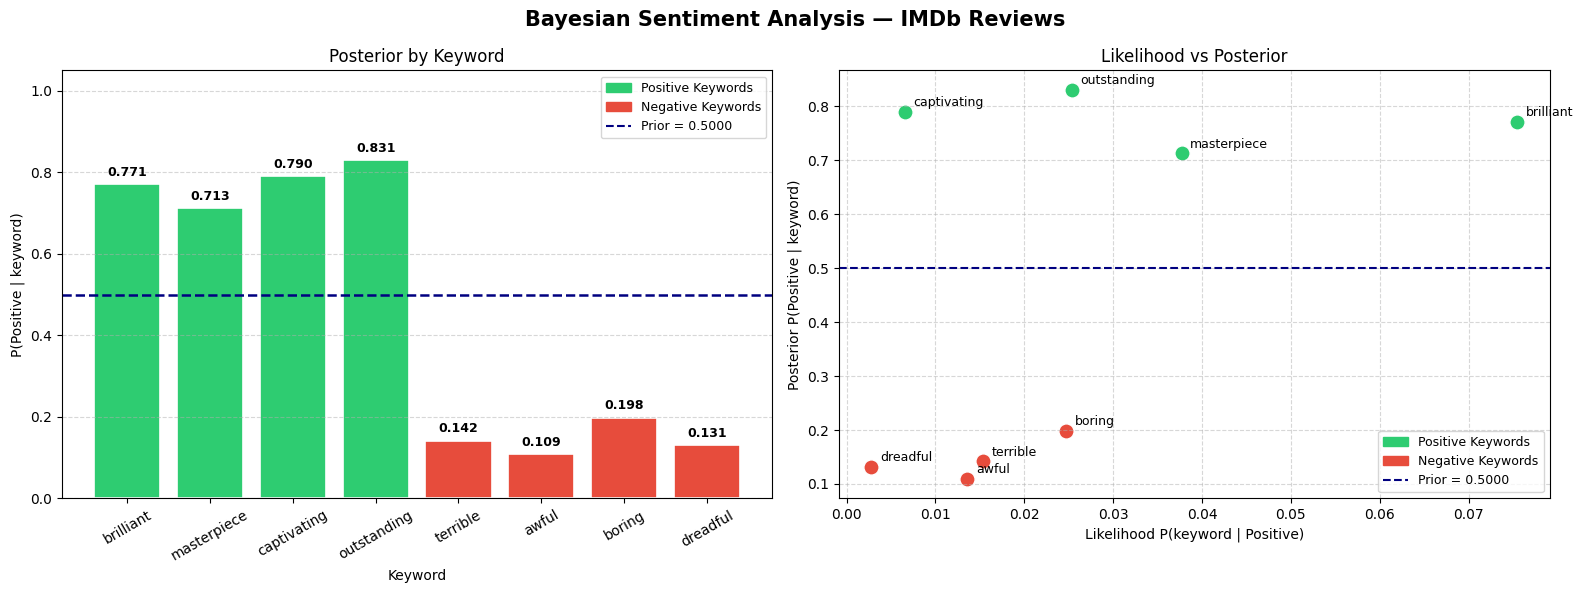

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

keywords   = [r['keyword']   for r in results]
posteriors = [r['posterior'] for r in results]
colors     = ['#2ecc71' if kw in positive_keywords else '#e74c3c' for kw in keywords]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Bayesian Sentiment Analysis — IMDb Reviews', fontsize=15, fontweight='bold')

# Bar chart
ax1 = axes[0]
bars = ax1.bar(keywords, posteriors, color=colors, edgecolor='white', linewidth=1.2)
ax1.axhline(y=prior_positive, color='navy', linestyle='--', linewidth=1.8)
ax1.set_ylim(0, 1.05)
ax1.set_ylabel('P(Positive | keyword)')
ax1.set_xlabel('Keyword')
ax1.set_title('Posterior by Keyword')
ax1.tick_params(axis='x', rotation=30)
ax1.grid(axis='y', linestyle='--', alpha=0.5)
for bar, val in zip(bars, posteriors):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.02, f'{val:.3f}', ha='center', fontsize=9, fontweight='bold')

# Scatter chart
ax2 = axes[1]
for r in results:
    color = '#2ecc71' if r['keyword'] in positive_keywords else '#e74c3c'
    ax2.scatter(r['likelihood'], r['posterior'], color=color, s=120, edgecolors='white')
    ax2.annotate(r['keyword'], (r['likelihood'], r['posterior']), textcoords='offset points', xytext=(6,4), fontsize=9)
ax2.axhline(y=prior_positive, color='navy', linestyle='--', linewidth=1.5)
ax2.set_xlabel('Likelihood P(keyword | Positive)')
ax2.set_ylabel('Posterior P(Positive | keyword)')
ax2.set_title('Likelihood vs Posterior')
ax2.grid(linestyle='--', alpha=0.5)

pos_patch  = mpatches.Patch(color='#2ecc71', label='Positive Keywords')
neg_patch  = mpatches.Patch(color='#e74c3c', label='Negative Keywords')
prior_line = plt.Line2D([0],[0], color='navy', linestyle='--', label=f'Prior = {prior_positive:.4f}')
for ax in axes:
    ax.legend(handles=[pos_patch, neg_patch, prior_line], fontsize=9)

plt.tight_layout()
plt.savefig('bayesian_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

##  Step 9: Findings

The prior P(Positive) ≈ 0.50 reflects the balanced IMDb dataset — without any keyword, there is a 50/50 chance a review is positive.

Positive keywords like **"brilliant"** and **"masterpiece"** push the posterior well above 0.50, confirming they are strong indicators of positive sentiment. Negative keywords like **"terrible"** and **"dreadful"** drop it significantly below 0.50.

The marginal probability matters — a keyword common across both classes dilutes the update, while a rare but class-specific keyword produces a sharper posterior shift. This is Bayes' Theorem at work: evidence updates our prior belief in proportion to how diagnostic that evidence is.